# Simple test of fill-spill-merge
This is the first notebook I created to test out application og fill-spill-merge [link](https://github.com/r-barnes/Barnes2020-FillSpillMerge)

In [1]:
import rasterio
from matplotlib import pyplot as plt
from urllib.request import urlretrieve
import numpy as np
import os
import rasterio

%matplotlib widget

m Input DEM           = downloaded.dem
m Output prefix       = fsm_results/simple_tests/test
m Surface water level = 1
m Surface water file  = 
m Ocean level         = 0
m Data width  = 10
m Data height = 10
m Data cells  = 64
Finished.
IO time   = 0.003403 s
Calc time = 0.000440125 s


/Users/jkingslake/miniconda3/envs/full_py_env/lib/python3.11/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


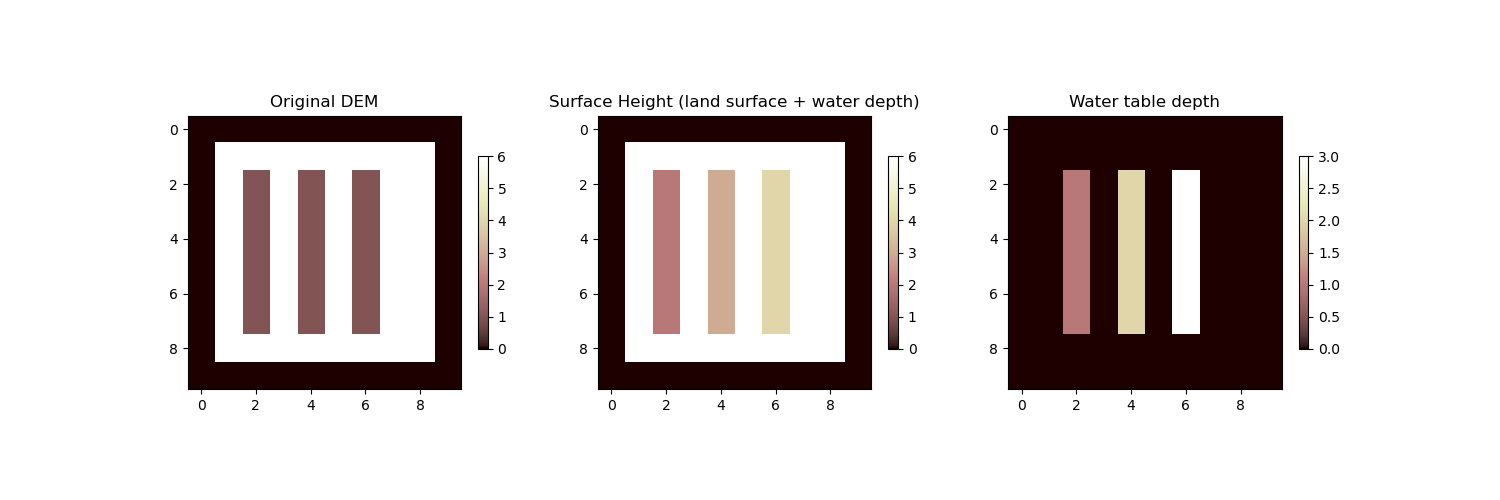

In [2]:
# download the DEM
url = "https://raw.githubusercontent.com/r-barnes/Barnes2019-DepressionHierarchy/master/test_cases/kerry_test3.dem"  #https://github.com/r-barnes/Barnes2019-DepressionHierarchy/tree/master/test_cases

dem_filename = "downloaded.dem"
urlretrieve(url, dem_filename)

def fsm_and_plots(dem_filename, uniform_water_input=1):
    # load the DEM
    with rasterio.open(dem_filename) as dataset:
        dem = dataset.read(1)

    # plot the DEM
    fig, axs = plt.subplots(1,3, figsize=(15,5))
    im =axs[0].imshow(dem, cmap='pink', vmin=-0)
    fig.colorbar(im, ax=axs[0], shrink=0.5)
    axs[0].set_title('Original DEM')

    # run fsm
    sea_level = 0
    #uniform_water_input = 1
    prefix = "fsm_results/simple_tests/test"
    os.system(f"../build/fsm.exe {dem_filename} {prefix} {sea_level} --swl={uniform_water_input}")

    def replace_nodata_with_nan(array):
        array[array == -9990.0] = np.nan
        return array


    # load the water surface height
    with rasterio.open(f'{prefix}-hydrologic-surface-height.tif') as dataset:
        sh = dataset.read(1)

    sh = replace_nodata_with_nan(sh)

    # plot the surface height
    im = axs[1].imshow(sh, cmap='pink', vmin=-0)
    fig.colorbar(im, ax=axs[1], shrink=0.5)
    axs[1].set_title('Surface Height (land surface + water depth)')

    # load the water table depth
    with rasterio.open(f'{prefix}-wtd.tif') as dataset:
        wtd = dataset.read(1)
    wtd = replace_nodata_with_nan(wtd)

    # plot the water table depth
    im = axs[2].imshow(wtd, cmap='pink', vmin=-0)
    fig.colorbar(im, ax=axs[2], shrink=0.5)
    axs[2].set_title('Water table depth')

    plt.show()

fsm_and_plots(dem_filename)

In [ ]:
pwd

In [ ]:
# Open the original DEM file
with rasterio.open('downloaded.dem') as src:
    dem_data = src.read(1)
    kwargs = src.profile


In [ ]:
dem = np.zeros((100,100)) + 50

rows, cols = dem.shape
y, x = np.meshgrid(np.arange(rows), np.arange(cols), indexing='ij')
xc = cols//2
yc = rows//2

def add_depression(dem, xc, yc, radius, depth):
    r = np.sqrt((x-xc)**2 + (y-yc)**2)
    
    additional_depth = - depth*np.cos(2*np.pi*r/(radius*4))
    additional_depth[r>radius] = 0
    return dem + additional_depth

dem = add_depression(dem, cols//2, rows//2, 25, 10)
dem = add_depression(dem, cols//2+15, rows//2-30, 12, 4)
dem[0,:] = -9.0   # this seems to prevent the error about not having any ocean cells. it has to be 9.0
#dem[:,0] = -9.0
#dem[:,-1] = -9.0

# Write the new DEM file
kwargs['width'] = dem.shape[1]
kwargs['height'] = dem.shape[0]
kwargs['dtype'] = str(dem.dtype)
with rasterio.open('new1.dem', 'w', **kwargs) as dst:
    dst.write(dem, 1)

#fig, axs = plt.subplots(1,1, figsize=(15,5))

#im = plt.imshow(dem)
#fig.colorbar(im, ax=axs, shrink=0.5)

#plt.show()

fsm_and_plots('new1.dem',10)

In [ ]:
fsm_and_plots('new1.dem')

In [ ]:
kwargs['width'] = dem.shape[1]
kwargs['height'] = dem.shape[0]

In [ ]:
pwd

/Users/jkingslake/miniconda3/envs/full_py_env/lib/python3.11/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


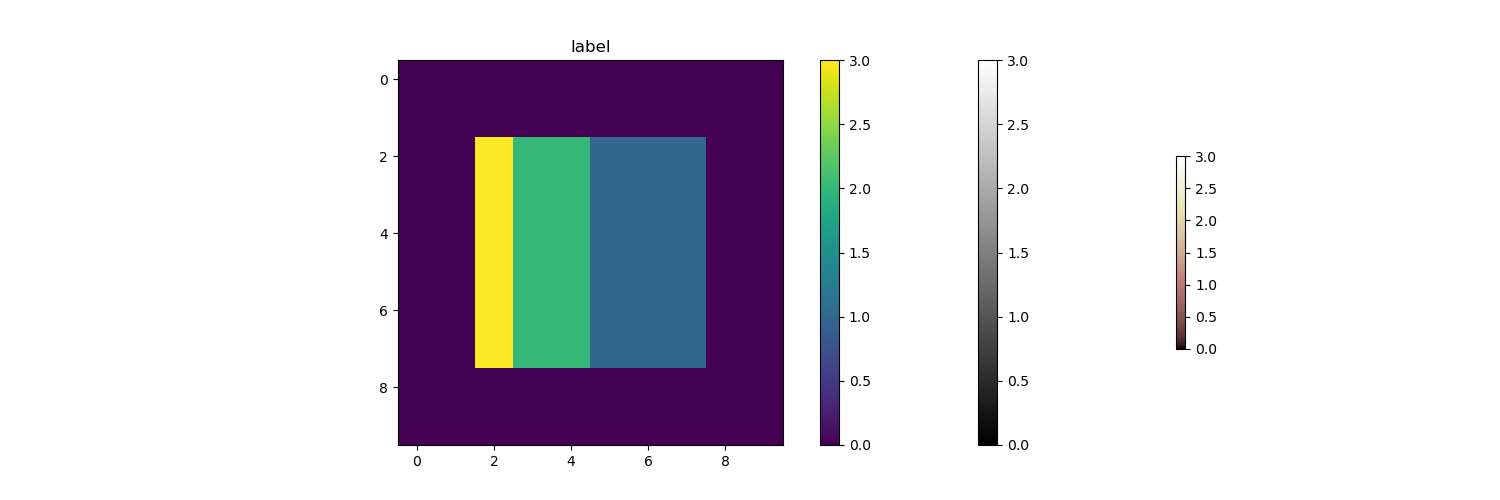

In [5]:
with rasterio.open('fsm_results/simple_tests/test-label.tif') as src:
    label = src.read(1)

plt.imshow(label)
plt.colorbar()
plt.show()

